In [1]:
import time
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold

import warnings

warnings.filterwarnings('ignore')

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# aws_data = pd.read_csv("./aws_train_data.csv")
aws_data = pd.read_csv("./aws_train.csv")
aws_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809153 entries, 0 to 1809152
Data columns (total 49 columns):
1             float64
2             float64
3             float64
4             float64
5             float64
6             float64
7             float64
8             float64
9             float64
10            float64
11            float64
12            float64
13            float64
14            float64
15            float64
16            float64
17            float64
18            float64
19            float64
20            float64
21            float64
22            float64
23            float64
24            float64
25            float64
26            float64
27            float64
28            float64
29            float64
30            float64
31            float64
32            float64
33            float64
34            float64
35            float64
36            float64
37            float64
38            float64
39            float64
40            float64
41     

In [335]:
# aws_data = aws_data[[str(i) for i in range(6)] +[str(i) for i in range(12,18)]+ [str(i) for i in range(24,30)]+ [str(i) for i in range(36,42)]+ ['difference']]

In [4]:
# 缺失值处理 ，直接删除
# aws_data[[str(i) for i in range(1,12)]].fillna(method="ffill",axis=1,inplace=True)
# aws_data[[str(i) for i in range(13,24)]].fillna(method="ffill",axis=1,inplace=True)
# aws_data[[str(i) for i in range(25,36)]].fillna(method="ffill",axis=1,inplace=True)
# aws_data[[str(i) for i in range(37,48)]].fillna(method="ffill",axis=1,inplace=True)
# # aws_data.fillna(0,inplace=True)
aws_data.dropna(inplace=True)
# # aws_data.shape

In [5]:
aws_data.shape

(1708272, 49)

In [338]:
#aws_data.loc[aws_data[['difference']][aws_data['difference'] > 0].index,['difference']] = aws_data[['difference']][aws_data['difference'] > 0] * 2

In [6]:
aws_data['difference'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: difference, dtype: float64

In [22]:
# difference = np.where(difference<=-5,-5,difference)
# difference = np.where(np.logical_and(difference>-5,difference<5),0,difference)
# difference = np.where(difference>=5,5,difference)
# difference = np.where(difference==-5,-1,difference)
# difference = np.where(difference==5,1,difference)
# difference

In [7]:
# aws_data['difference'] = difference
aws_data.head()

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,difference
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,-1.0,-2.0,-3.0,-2.0,-4.0,-3.0,-2.0,-1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.0,-6.0,-2.0,-4.0,-5.0,-4.0,-4.0,-1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.0,-2.0,-4.0,-4.0,-3.0,-3.0,-5.0,-1.0,-2.0,0.0


In [11]:
# 目标值二值化
difference_ = aws_data['difference']
difference_arr = difference_.values
difference_arr = np.where(difference_<0 ,0,1)
difference_arr

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
# # 删除低方差特征
# # 1、实例化一个转换器类
# transfer = VarianceThreshold(threshold=1)
# # 2、调用fit_transform
# storm_df = transfer.fit_transform(aws_data.iloc[:, 1:48])
# print("删除低方差特征的结果：\n", storm_df)
# print("形状：\n", storm_df.shape)

In [25]:
# aws_data = pd.DataFrame(storm_df)
# aws_data.head()

In [26]:
aws_data.corr()[['difference']].sort_values('difference',ascending = False).index

Index(['difference', '25', '26', '27', '22', '21', '20', '28', '23', '19',
       '29', '18', '24', '17', '30', '16', '31', '48', '15', '47', '14', '32',
       '46', '13', '45', '33', '44', '34', '43', '42', '35', '41', '36', '40',
       '39', '12', '38', '37', '11', '1', '10', '2', '3', '9', '4', '8', '5',
       '6', '7'],
      dtype='object')

In [27]:
aws_data.corr()[['difference']].sort_values('difference',ascending = False)

,difference
difference,1.000000
25,0.108193
26,0.099145
27,0.088612
22,0.088204
21,0.080493
20,0.079327
28,0.074996
23,0.070887
19,0.066225


In [28]:
# 确定特征值和目标值
y = aws_data['difference']
x = aws_data[[str(i) for i in range(1,49)]]
# x = aws_data[['24', '22', '25', '21', '23', '26', '20', '19', '27',
#        '18', '28', '17', '29', '16', '15', '30', '14', '13', '47', '12', '31',
#        '46', '32', '45', '44', '33', '43', '34', '42', '35', '41', '40', '39',
#        '36', '38', '37', '11', '10', '0', '1', '9', '2', '8', '3', '7', '4']]

In [32]:
# 数据切割
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [30]:
# 特征工程
# 数据标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# transfer = MinMaxScaler()
# x_train = transfer.fit_transform(x_train)
# x_test = transfer.transform(x_test)

In [33]:
# # 建立模型 线性回归 梯度下降法
# # estimator = SGDRegressor(max_iter=1000,learning_rate="constant",eta0=0.0001)
# estimator = SGDRegressor()
# estimator.fit(x_train,y_train)

# # Logistic回归
# estimator = LogisticRegression()
# estimator.fit(x_train,y_train)

# 随机森林
estimator = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
estimator.fit(x_train,y_train)

# #保存Model(注:save文件夹要预先建立，否则会报错)
# joblib.dump(estimator, './estimator.pkl')

# # #读取Model
# # estimator = joblib.load('./estimator.pkl')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [35]:
joblib.dump(estimator, './estimator.pkl')

['./estimator.pkl']

In [36]:
# 模型评估
# 获取系数等值
y_predict = estimator.predict(x_test)
print("准确率为:",estimator.score(x_test,y_test))
# # 平均绝对误差（MAE）
error = mean_absolute_error(y_test, y_predict)
print("误差为:", error)

准确率为: 0.209263193416392
误差为: 1.6608501834448757


In [354]:
estimator.predict([[ 0.8,  0.7,  0.6,  0.5,  0.3,  0. , -0.5, -0.6,  2.4,  2.1,  1.6,
        0.7, -0.3, -0.4, -0.3, -0.3, -0.3, -0.3, -0.1, -0.2, -0.1, -0.1,
        0. ,  0. ,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  100. ]])

array([0.])

In [167]:
yy_test = y_test
xx_test = x_test

In [152]:
np.where(y_predict==-1,0,y_predict)

array([-2.93971857,  0.01070428, -3.65937562, ..., -5.16968336,
       -1.11408394, -1.03481445])

In [409]:
data_path = r"D:\Python\radar_data\Deal_awsData\train_data\data_csv"
test_data = pd.read_csv(os.path.join(data_path,f"{201607202010}.csv"))
test_data.fillna(0,inplace=True)
test_arr = test_data.values

In [410]:
result = estimator.predict(test_arr)
result.shape

(537,)

In [405]:
# with open("./aws_data.txt") as f:
#     aws_dict = eval(f.read())
# aws_dict['rain_chge']

In [384]:
import json
import os
import numpy as np
import pandas as pd
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


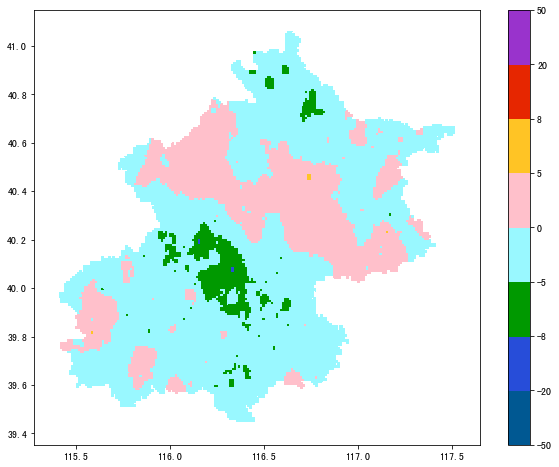

In [411]:
class tree(object):

    def __init__(self, X=None, z=None, leafsize=10):
        if not X is None:
            self.tree = cKDTree(X, leafsize=leafsize)
        if not z is None:
            self.z = z

    def fit(self, X=None, z=None, leafsize=10):

        return self.__init__(X, z, leafsize)

    def __call__(self, X, k=6, eps=1e-6, p=2, regularize_by=1e-9, distance=np.nan):

        self.distances, self.idx = self.tree.query(X, k, eps=eps, p=p)
        self.distances += regularize_by
        weights = self.z[self.idx.ravel()].reshape(self.idx.shape)
        weights[self.distances > distance] = np.nan
        self.distances[self.distances > distance] = np.nan
        mw = np.nansum(weights / self.distances, axis=1) / np.nansum(1. / self.distances, axis=1)
        mw = np.nan_to_num(mw)
        return mw

    def transform(self, X, k=6, p=2, eps=1e-6, regularize_by=1e-9, distance=np.nan):

        return self.__call__(X, k, eps, p, regularize_by, distance)


def coord2points(lon_arr, lat_arr, coords):
    """
    经纬度转换为相对坐标
    :param coords: 输入坐标点
    :return:
    """
    coords = np.array(coords).reshape((-1, 2))
    index_arr = []
    for coord in coords:
        lon = coord[0]
        lat = coord[1]
        dis = np.power((lon - lon_arr), 2) + np.power((lat - lat_arr), 2)
        index = np.unravel_index(dis.argmin(), dis.shape)
        index_arr.append(index)
    index_arr = np.array(index_arr)
    return index_arr


def getAwsData(edata, csv_df):
    """
    获取自动站数据（温度）
    aws_file: aws data file
    csv_df: Basic information of automatic station
    element： Get the data of the element
    """
    # with open(aws_file) as f:
    #     jdata = json.load(f)
    lon_arr = []
    lat_arr = []
    timeindex = "201607201200"
    # print(timeindex)
#     for i, v in aws_data[element].items():
#         _data = v.get(element)[0]
#         if _data == '':
#             continue
#         aws_id.append(i)
#         edata.append(_data)
#     # print('edata',edata)
    with open("./aws_id.txt") as f:
        aws_id = eval(f.read())
    for aid in aws_id:
        cond = aid == csv_df['STATIONID']
        if cond.sum() == 0:
            raise ValueError
        lon = csv_df[cond]['LONGITUDE'].tolist()[0]
        lat = csv_df[cond]['LATITUDE'].tolist()[0]
        alt = csv_df[cond]['ALTITUDE'].tolist()[0]
        lon_arr.append(lon)
        lat_arr.append(lat)
#     print(edata.shape)
#     print(len(lon_arr))
    edata = np.array(edata)
    lon_arr = np.array(lon_arr)
    lat_arr = np.array(lat_arr)
    result_arr = np.concatenate([edata[..., np.newaxis], lon_arr[..., np.newaxis], lat_arr[..., np.newaxis]], axis=1)
    return result_arr, timeindex


def test_1(edata, PATH='./'):
    colors = ['#005892', '#274dd9',
              '#009900', '#99f8ff', '#FFC0CB', '#ffc425', '#e62600', '#9933cc']
    levels = [-50., -20., -8., -5., 0,
              5., 8., 20., 50.]
    grid = np.load("./radar_beijing.npy")[::, 400:600, 300:500]
    beijing_poly = np.load("./poly_beijing.npy")
    csvin = os.path.join("./station4.csv")
    csv_df = pd.read_csv(csvin)
    xx, yy = beijing_poly[0], beijing_poly[1]

    lon_grid, lat_grid = grid[0], grid[1]
    data, timeindex = getAwsData(edata, csv_df)
    idw_tree = tree(data[:, 1:], data[:, 0])
    coords = np.concatenate([lon_grid[..., np.newaxis], lat_grid[..., np.newaxis]], axis=2).reshape(-1, 2)
    result = idw_tree(coords, distance=0.2).reshape(lon_grid.shape)


    nan_arr = np.full(lon_grid.shape, np.nan)
    nan_arr[yy, xx] = result[yy, xx]
    
    plt.figure(figsize=(10, 8))
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    plt.pcolormesh(lon_grid, lat_grid, nan_arr, cmap=cmap, norm=norm)
    # plt.pcolormesh(lon_grid, lat_grid, difference)
    plt.colorbar()
    plt.savefig("./201607201910.png",bbox_inches = "tight")
    plt.show()
    plt.close()
    
if __name__ == "__main__":
    test_1(edata=result)

In [402]:
aws_data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,difference
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.860325
2,-3.5,-6.3,-9.2,-11.0,-12.4,-14.4,-16.3,-17.5,-18.2,-19.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.191097
3,-3.9,-8.2,-11.5,-14.5,-16.5,-19.1,-21.0,-22.0,-22.8,-24.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.363686
4,-5.2,-8.0,-10.1,-11.8,-13.7,-14.8,-15.5,-16.6,-18.2,-19.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.022568
5,-4.3,-8.2,-12.3,-15.5,-17.3,-19.0,-21.3,-24.3,-25.7,-26.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-6.488822
6,-0.7,-4.6,-7.3,-9.3,-11.6,-14.5,-16.7,-18.7,-21.1,-23.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.070061
9,1.0,-0.6,-2.9,-5.9,-8.3,-9.9,-11.5,-13.0,-14.4,-15.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.573388
13,-4.1,-6.3,-8.3,-10.4,-13.9,-15.8,-18.6,-20.8,-22.0,-23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.437689
14,-7.0,-9.9,-12.6,-13.9,-15.8,-17.3,-18.8,-20.6,-23.1,-24.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.051050
19,0.5,-2.0,-5.0,-6.6,-8.4,-10.3,-12.0,-13.5,-14.9,-16.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.962301


In [41]:
dic = {}
for i in range(1,49):
    dic[str(i)] = str(-1)
print(dic)

{'1': '-1', '2': '-1', '3': '-1', '4': '-1', '5': '-1', '6': '-1', '7': '-1', '8': '-1', '9': '-1', '10': '-1', '11': '-1', '12': '-1', '13': '-1', '14': '-1', '15': '-1', '16': '-1', '17': '-1', '18': '-1', '19': '-1', '20': '-1', '21': '-1', '22': '-1', '23': '-1', '24': '-1', '25': '-1', '26': '-1', '27': '-1', '28': '-1', '29': '-1', '30': '-1', '31': '-1', '32': '-1', '33': '-1', '34': '-1', '35': '-1', '36': '-1', '37': '-1', '38': '-1', '39': '-1', '40': '-1', '41': '-1', '42': '-1', '43': '-1', '44': '-1', '45': '-1', '46': '-1', '47': '-1', '48': '-1'}
